In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.patches as mpatches
import numpy as np
from colour import Color
from sklearn.neighbors import KernelDensity



In [2]:
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

df = pd.read_sql_query("SELECT * FROM Fires", cnx)

In [3]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [4]:
df = df.loc[df.STATE == "CO",:]

print(df.columns)

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')


In [5]:
print(df.FIRE_YEAR)

47         2005
61         2005
62         2005
114        2005
205        2005
           ... 
1860039    2015
1860043    2015
1860044    2015
1860048    2015
1860054    2015
Name: FIRE_YEAR, Length: 34157, dtype: int64


In [6]:
fires = df[["FOD_ID", "FIRE_YEAR", "FIRE_SIZE", "DISCOVERY_DOY", "DISCOVERY_TIME",
           "STAT_CAUSE_CODE", "STAT_CAUSE_DESCR", "CONT_DOY", "CONT_TIME", "FIRE_SIZE",
            "LATITUDE", "LONGITUDE", "STATE"]]
fires.head()

,FOD_ID,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE
47,48,2005,0.5,165,1300,1.0,Lightning,165.0,1530,0.5,39.292222,-105.183056,CO
61,62,2005,0.2,150,1100,1.0,Lightning,151.0,1218,0.2,38.913333,-105.983611,CO
62,63,2005,0.1,172,1241,4.0,Campfire,172.0,1506,0.1,39.100278,-106.367500,CO
114,117,2005,80.0,188,1907,1.0,Lightning,188.0,2130,80.0,37.345000,-102.805833,CO
205,209,2005,2.5,164,1428,9.0,Miscellaneous,164.0,1736,2.5,38.891111,-105.431944,CO


In [7]:
#Data Visualization

coMap = gpd.read_file("Colorado_County_Boundaries\\Colorado_County_Boundaries.shp")

<AxesSubplot:>

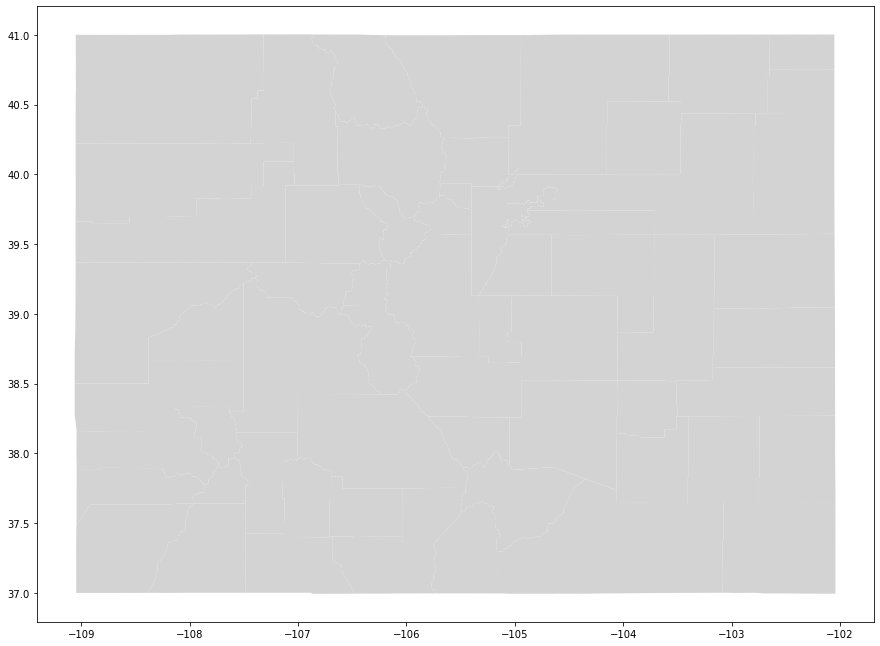

In [8]:
fig, ax = plt.subplots(figsize = (15,15))
coMap.plot(ax = ax, color = "lightgrey")

47             0
61             0
62             0
114           80
205            2
           ...  
1860039      500
1860043      610
1860044      270
1860048    11699
1860054      120
Name: FIRE_SIZE, Length: 23911, dtype: int32
47             0.5
61             0.2
62             0.1
114           80.0
205            2.5
            ...   
1860039      500.0
1860043      610.0
1860044      270.0
1860048    11699.0
1860054      120.0
Name: FIRE_SIZE, Length: 23911, dtype: float64


<AxesSubplot:>

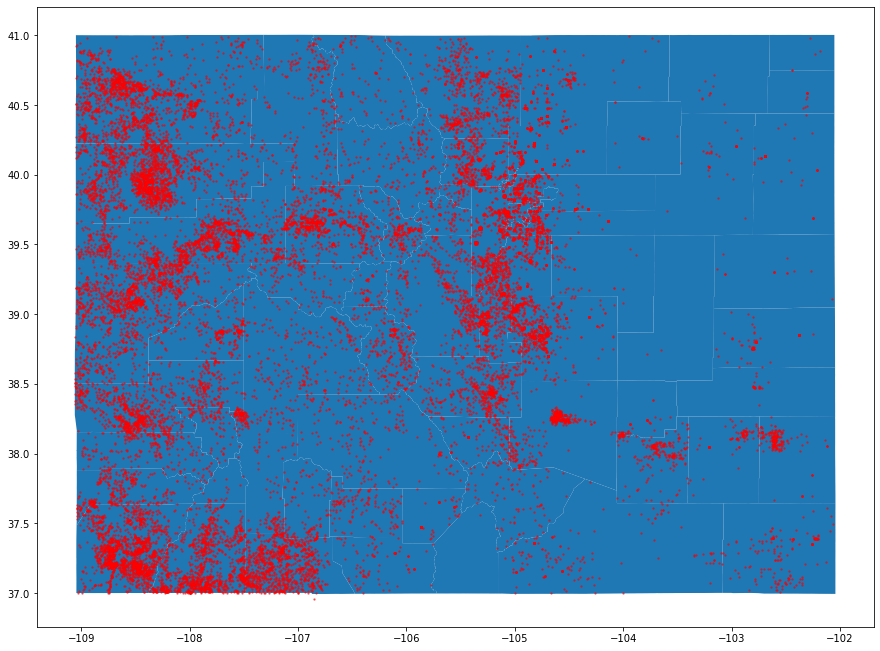

In [114]:
fires2015 = fires.loc[(fires.FIRE_YEAR >= 2000) & (fires.FIRE_YEAR <= 2015),:]

fig2, ax2 = plt.subplots(figsize = (15,15))
crs = "EPSG:4326"
geometry = [Point(xy) for xy in zip(fires2015.LONGITUDE, fires2015.LATITUDE)]

geo_df = gpd.GeoDataFrame(fires2015, crs = crs, geometry = geometry)

markerSize = fires2015.FIRE_SIZE.astype(int)
print(markerSize.iloc[:,1])
print(geo_df['FIRE_SIZE'].iloc[:,1])
coMap.plot(ax = ax2)
#geo_df.plot(ax = ax2, markersize = geo_df['FIRE_SIZE'].iloc[:,1], color = 'red', alpha = .5)
geo_df.plot(ax = ax2, markersize = 2, color = 'red', alpha = .5)


In [10]:
fires2015.loc[fires2015['FIRE_SIZE'].idxmax()]

,FOD_ID,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,geometry
1565147,201431384,2012,87275.0,161,0600,1.0,Lightning,182.0,2000,87275.0,40.589444,-105.403611,CO,POINT (-105.40361 40.58944)
1565147,201431384,2012,87275.0,161,0600,1.0,Lightning,182.0,2000,87275.0,40.589444,-105.403611,CO,POINT (-105.40361 40.58944)


In [115]:
maxLat = fires2015.loc[fires2015['LATITUDE'].idxmax()]['LATITUDE'] + .01
minLat = fires2015.loc[fires2015['LATITUDE'].idxmin()]['LATITUDE'] + .04
maxLon = fires2015.loc[fires2015['LONGITUDE'].idxmax()]['LONGITUDE'] + .03
minLon = fires2015.loc[fires2015['LONGITUDE'].idxmin()]['LONGITUDE']

print(maxLat)
print(minLat)
print(maxLon)
print(minLon)



41.0083
36.9992
-102.03746072999999
-109.0618


<AxesSubplot:>

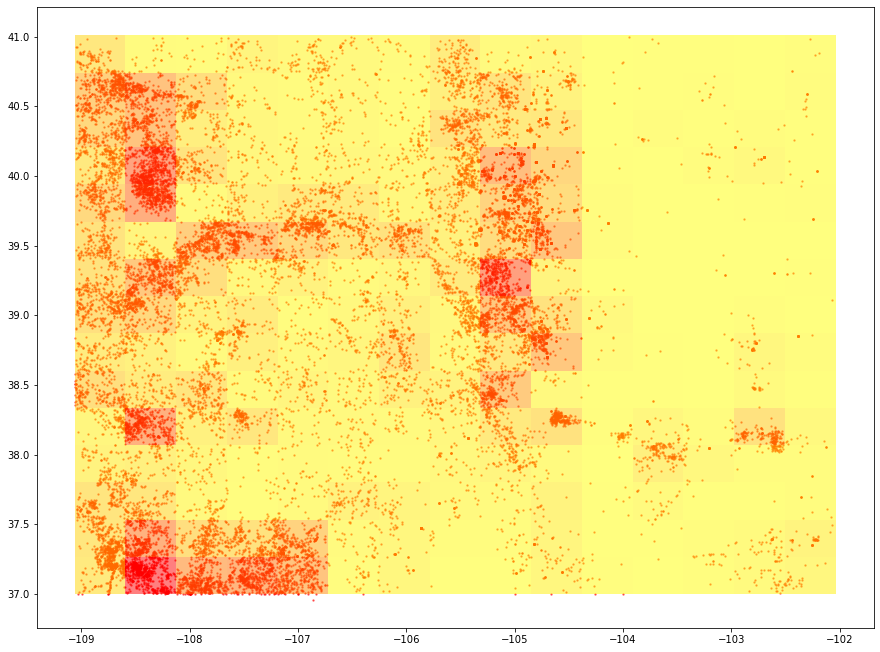

In [116]:
fig, ax = plt.subplots(figsize = (15,15))

numRectWide = 15
numRectTall = 15
w = (maxLon - minLon) / numRectWide
h = (maxLat - minLat) / numRectTall

bottomLefts = np.zeros([numRectTall, numRectWide, 2])
points = np.zeros([numRectTall * numRectWide, 2])
GlobalBottomLeft = [minLat, minLon]

for r in range(numRectTall):
    for c in range(numRectWide):
        bottomLefts[r,c,0] = GlobalBottomLeft[0] + h * r
        bottomLefts[r,c,1] = GlobalBottomLeft[1] + w * c
        points[numRectTall * r + c][1] = GlobalBottomLeft[1] + w * c
        points[numRectTall * r + c][0] = GlobalBottomLeft[0] + h * r

        
coMap.plot(ax = ax, color = "white")

pointDensities = np.zeros(numRectTall * numRectWide)
i = 0

for point in points:
    #print(point)
    firesInRegion = fires.loc[(fires.LATITUDE > point[0]) & (fires.LATITUDE <= (point[0] + h)) & (fires.LONGITUDE > point[1]) & (fires.LONGITUDE <= (point[1] + h)),:]
    pointDensities[i] = len(firesInRegion['FOD_ID'])
    i = i + 1

maxDens = max(pointDensities)

numColors = 200

pointDensities = numColors * pointDensities / maxDens

yellow = Color("yellow")
colors = list(yellow.range_to(Color("red"),numColors + 1))
colors = [c.hex for c in colors]

#print(pointDensities)
i = 0
for point in points:
    facecolor = colors[int(round(pointDensities[i]))]
    rect=mpatches.Rectangle((point[1],point[0]),w,h, 
                        alpha=0.5,
                        facecolor=facecolor)
    plt.gca().add_patch(rect)
    i = i + 1
#print(points)

geo_df.plot(ax = ax, markersize = 2, color = 'red', alpha = .5)

C:\Users\Paxton\AppData\Local\Temp\ipykernel_119484\2081638413.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, zs)


<AxesSubplot:>

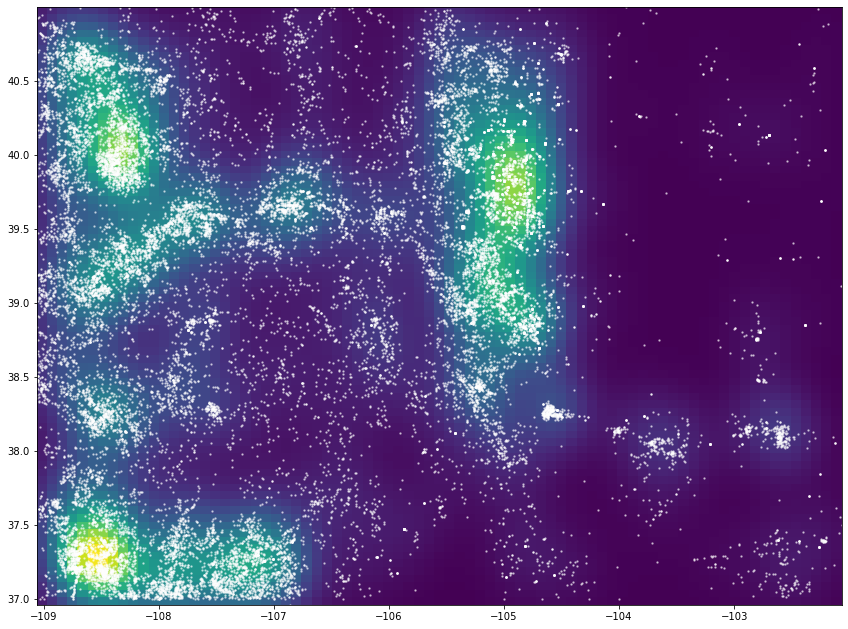

In [117]:
x = fires2015.LONGITUDE
y = fires2015.LATITUDE

longLatCoordinates = np.vstack([x, y]).T

kde = KernelDensity(bandwidth=.2, kernel='gaussian', metric = 'euclidean')
kde.fit(longLatCoordinates)

xbins = 80
ybins = 80

xx, yy = np.meshgrid(np.linspace(x.min(),x.max(),xbins), 
                 np.linspace(y.min(),y.max(),ybins))
xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T

zs = np.exp(kde.score_samples(xy_sample))    
zs = np.reshape(zs, xx.shape)


fig, ax = plt.subplots(figsize = (15,11))
ax.pcolormesh(xx, yy, zs)
geo_df.plot(ax = ax, markersize = 2, color = 'white', alpha = .5)